In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install opencv-python moviepy ffmpeg numpy albumentations


  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=b93f1e48e72f151a3652c2b501a843bb443615e880f847f92c6fc63d7de2aa52
  Stored in directory: /root/.cache/pip/wheels/56/30/c5/576bdd729f3bc062d62a551be7fefd6ed2f761901568171e4e
Successfully built ffmpeg


In [11]:
!pip install mtcnn opencv-python numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.9 MB/s eta 0:00:00


Video loaded successfully!


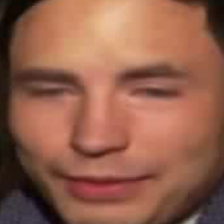

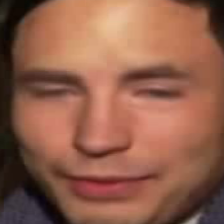

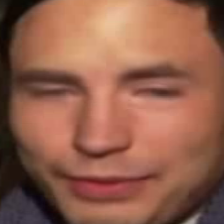

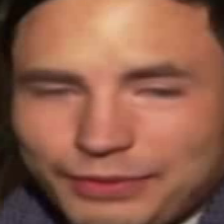

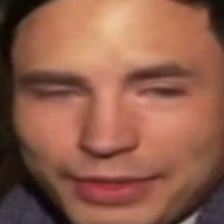

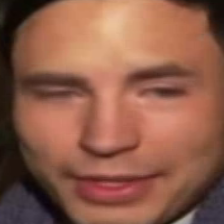

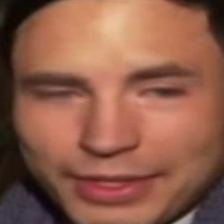

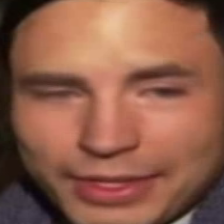

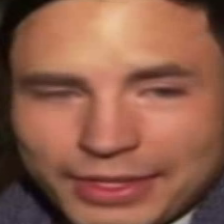

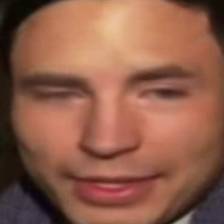

In [12]:
import cv2
import numpy as np
from mtcnn import MTCNN
from google.colab.patches import cv2_imshow

# Initialize MTCNN face detector
detector = MTCNN()

# Load video
video_path = "/content/drive/MyDrive/Deepfake_videos/id9_id4_0005.mp4"  # Change to your actual path
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video loaded successfully!")

# Function to extract and preprocess the face
def extract_and_preprocess_face(frame, size=(224, 224)):
    faces = detector.detect_faces(frame)  # Detect faces

    if len(faces) == 0:
        return None  # No face detected

    # Get the bounding box of the first detected face
    x, y, width, height = faces[0]['box']

    # Crop the face region
    face_crop = frame[y:y+height, x:x+width]

    # Resize to fixed size (224x224)
    face_resized = cv2.resize(face_crop, size)

    # Normalize pixel values to range [0,1]
    face_normalized = face_resized / 255.0

    return face_normalized

# Read and display the first few face frames
frame_count = 0
while cap.isOpened() and frame_count < 10:  # Read only 10 frames
    ret, frame = cap.read()
    if not ret:
        break

    face_frame = extract_and_preprocess_face(frame)  # Get only the face frame

    if face_frame is not None:
        # Convert back to 0-255 for displaying
        cv2_imshow((face_frame * 255).astype(np.uint8))

    frame_count += 1
    cv2.waitKey(1)

cap.release()
cv2.destroyAllWindows()


In [6]:
def preprocess_frame(frame, size=(224, 224)):
    frame_resized = cv2.resize(frame, size)  # Resize
    frame_normalized = frame_resized / 255.0  # Normalize to range [0,1]
    return frame_normalized

# Example usage
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()

if ret:
    processed_frame = preprocess_frame(frame)
    print("Frame shape after processing:", processed_frame.shape)

cap.release()


Frame shape after processing: (224, 224, 3)


In [13]:
import os

output_folder = "/content/face_frames"
os.makedirs(output_folder, exist_ok=True)

cap = cv2.VideoCapture(video_path)
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    face_frame = extract_and_preprocess_face(frame)  # Extract face

    if face_frame is not None:
        filename = os.path.join(output_folder, f"face_{frame_count}.jpg")
        cv2.imwrite(filename, (face_frame * 255).astype(np.uint8))  # Save face image

    frame_count += 1

cap.release()
print(f"Extracted face frames saved in: {output_folder}")


Extracted face frames saved in: /content/face_frames


In [14]:
faces_list = []

cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    face_frame = extract_and_preprocess_face(frame)

    if face_frame is not None:
        faces_list.append(face_frame)

cap.release()

# Convert list to NumPy array and save
faces_array = np.array(faces_list)
np.save("/content/processed_faces.npy", faces_array)

print("Processed face frames saved as NumPy array!")


Processed face frames saved as NumPy array!


In [10]:
import shutil

dataset_path = "/content/frames"
train_path = "/content/train"
val_path = "/content/val"
test_path = "/content/test"

os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

all_frames = os.listdir(dataset_path)
split_1 = int(0.7 * len(all_frames))  # 70% training
split_2 = int(0.85 * len(all_frames))  # 15% validation, 15% test

train_files = all_frames[:split_1]
val_files = all_frames[split_1:split_2]
test_files = all_frames[split_2:]

for file in train_files:
    shutil.move(os.path.join(dataset_path, file), train_path)
for file in val_files:
    shutil.move(os.path.join(dataset_path, file), val_path)
for file in test_files:
    shutil.move(os.path.join(dataset_path, file), test_path)

print("Dataset split into Train, Validation, and Test sets!")


Dataset split into Train, Validation, and Test sets!
